In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import linear_classifiers as lc
from typing import List

In [23]:
ds3_train, ds3_valid, ds3_test = pd.read_csv("data/ds3_train.csv"), pd.read_csv("data/ds3_valid.csv"), pd.read_csv("data/ds3_test.csv")

first consider case where we know all true labels (part c)

In [24]:
ds3_train.head()

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0


In [25]:
def extract_columns(df: pd.DataFrame) -> List[np.ndarray]:
    return [df[col].to_numpy() for col in df.columns]

In [26]:
train_labels_t, train_x1, train_x2, train_labels_y = extract_columns(ds3_train)

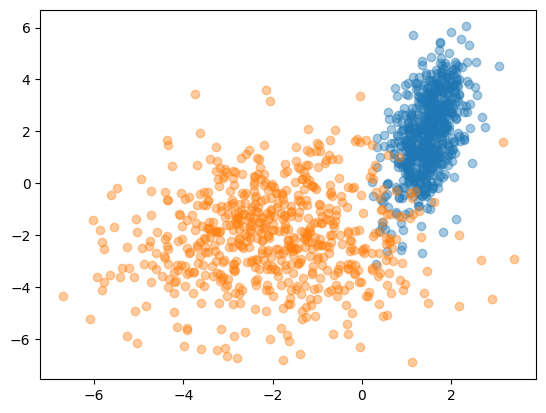

In [27]:
plt.scatter(train_x1[train_labels_t == 1], train_x2[train_labels_t == 1], alpha=0.4)
plt.scatter(train_x1[train_labels_t == 0], train_x2[train_labels_t == 0], alpha=0.4)
plt.show()

In [28]:
logreg = lc.LogisticRegression()

In [29]:
design_matrix = np.column_stack([train_x1, train_x2])
logreg.train_model(design_matrix, train_labels_t, theta_0=[0,0,0])
theta_t_trained = logreg.theta

In [35]:
def plot_decision_line(theta: np.ndarray, features: np.ndarray, colour: str):
    x, y = np.meshgrid(np.linspace(features[:,0].min(), features[:,0].max(), 100), np.linspace(features[:,1].min(), features[:,1].max(), 100))
    plt.contour(x, y, theta[0] + theta[1]*x + theta[2]*y, levels= [0], colors = colour)

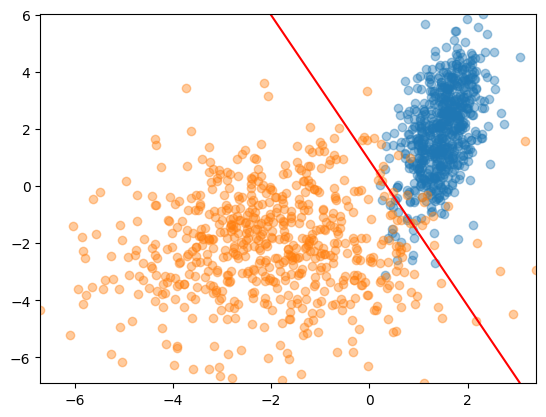

In [36]:
plot_decision_line(theta_t_trained, design_matrix, colour='red')
plt.scatter(train_x1[train_labels_t == 1], train_x2[train_labels_t == 1], alpha=0.4)
plt.scatter(train_x1[train_labels_t == 0], train_x2[train_labels_t == 0], alpha=0.4)
plt.show()


Instead of training with t which are the true labels, we'll train with y which are the incomplete labels (and see how it looks like on the plot - part d)

In [33]:
logreg.train_model(design_matrix, train_labels_y, theta_0=[0,0,0])
theta_y_trained = logreg.theta

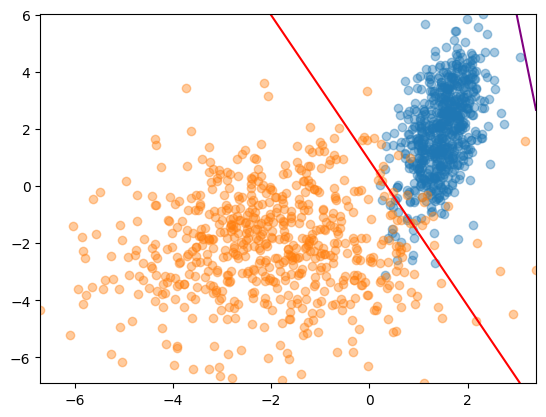

In [37]:
plot_decision_line(theta_t_trained, design_matrix, colour='red')
plot_decision_line(theta_y_trained, design_matrix, colour='purple')
plt.scatter(train_x1[train_labels_t == 1], train_x2[train_labels_t == 1], alpha=0.4)
plt.scatter(train_x1[train_labels_t == 0], train_x2[train_labels_t == 0], alpha=0.4)
plt.show()

We can see that using the incomplete y labels as-is is utter garbage (which is all we would have cus technically the t labels are the true labels which we do not actually have)

In [39]:
valid_t, valid_x1, valid_x2, valid_y = extract_columns(ds3_valid)

In [45]:
valid_x1_plus = valid_x1[valid_y == 1]
valid_x2_plus = valid_x2[valid_y == 1]
hyp_valid_plus = lc.sigmoid((np.column_stack([np.ones(len(valid_x1_plus)), valid_x1_plus, valid_x2_plus])).dot(theta_y_trained))

In [47]:
alpha = 1/(len(hyp_valid_plus))*np.sum(hyp_valid_plus)

In [50]:
theta_estimated = np.array([np.log(2/alpha - 1),0,0]) + theta_y_trained

In [53]:
#get test data and plot:
test_t, test_x1, test_x2, test_y = extract_columns(ds3_test)
test_matrix = np.column_stack([test_x1, test_x2])

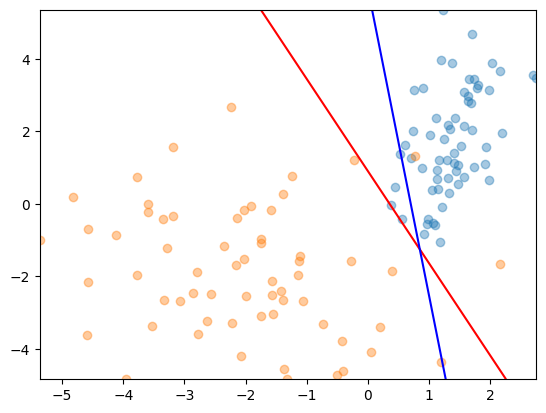

In [54]:
plot_decision_line(theta_t_trained, test_matrix, colour='red')
plot_decision_line(theta_y_trained, test_matrix, colour='purple')
plot_decision_line(theta_estimated, test_matrix, colour='blue')
plt.scatter(test_x1[test_t == 1], test_x2[test_t == 1], alpha=0.4)
plt.scatter(test_x1[test_t == 0], test_x2[test_t == 0], alpha=0.4)
plt.show()